In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read the file using pandas library
admissions = pd.read_csv('D:\Kaggle\Linear Regression\graduate-admissions\Admission_Predict.csv')

In [3]:
#View the head of the dataset
admissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
#Check the descriptive statistics of admissions
admissions.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
#Check what columns contains null, if any
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
#So as it turns out, this dataset does not contain any null values

In [7]:
#Renaming column Chance of Admit
admissions=admissions.rename(columns = {'Chance of Admit ':'Chance of Admit'})

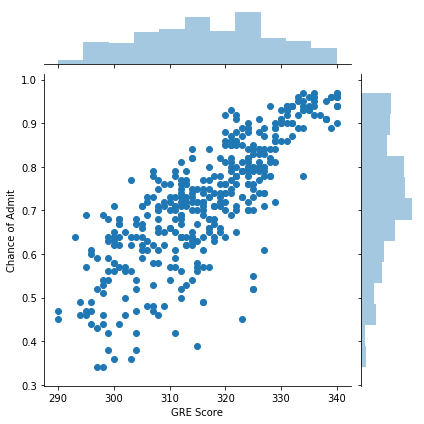

In [8]:
#Making a joint plot to see the relationship between GRE Score and Admissions
sns.jointplot(x = 'GRE Score', y = 'Chance of Admit', data = admissions)

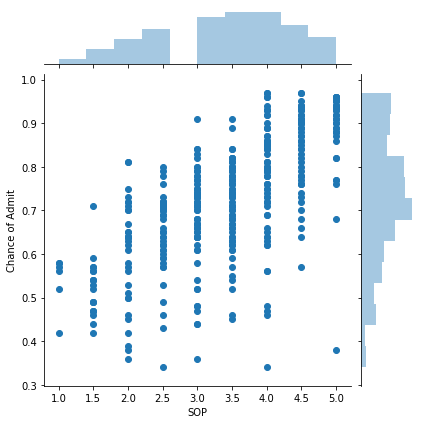

In [9]:
#Making a joint plot to see the relationship between SOP and Admissions
sns.jointplot(x = 'SOP', y = 'Chance of Admit', data = admissions)

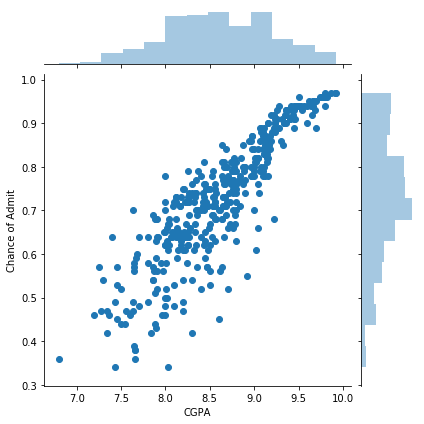

In [10]:
#Making a joint plot to see the relationship between CGPA and Admissions
sns.jointplot(x = 'CGPA', y = 'Chance of Admit', data = admissions)

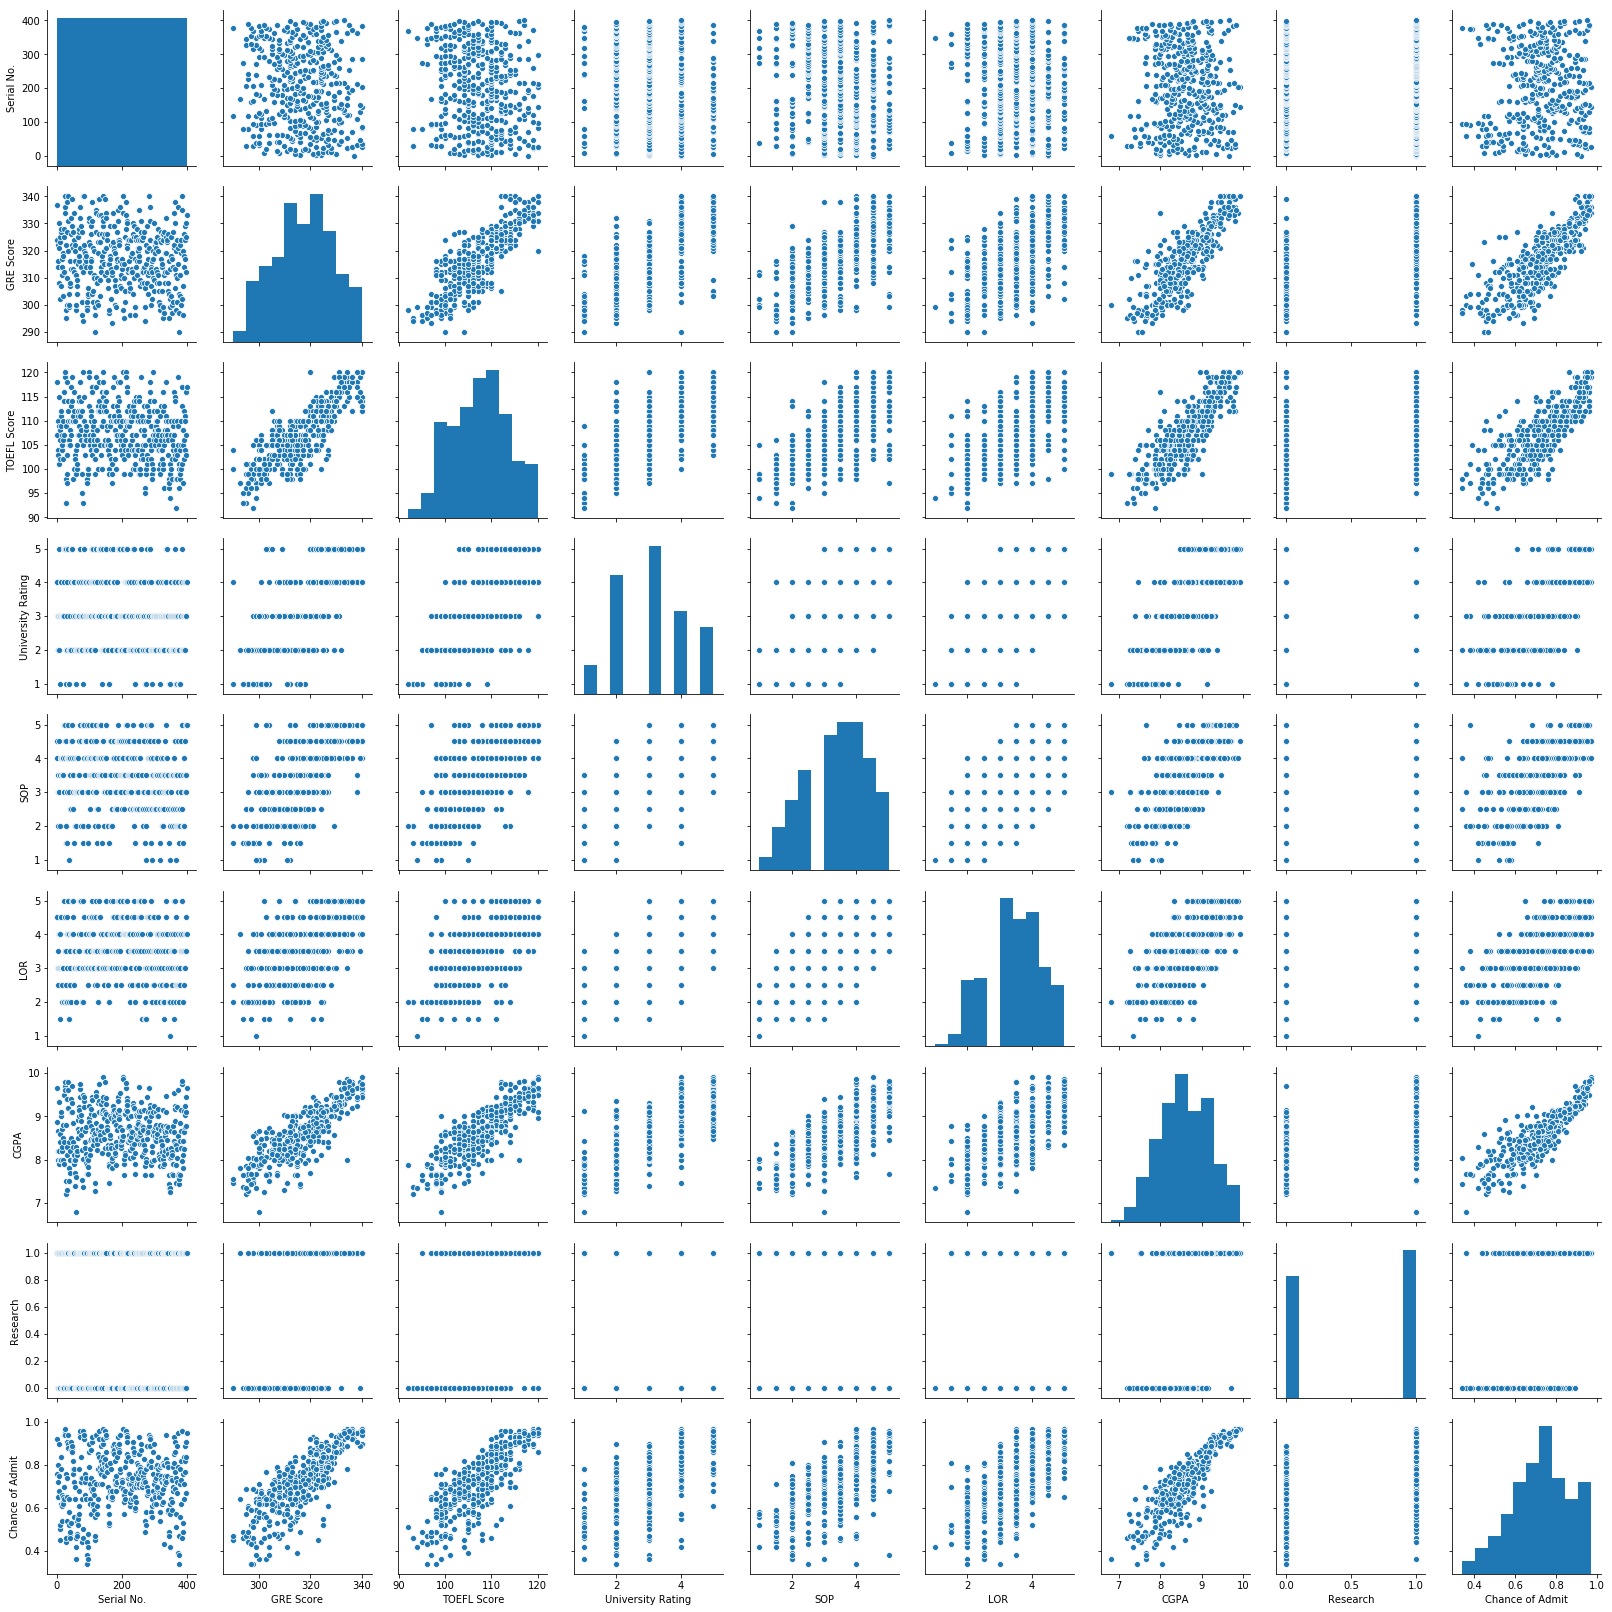

In [11]:
#Visualize correlation among the different variables
sns.pairplot(admissions)

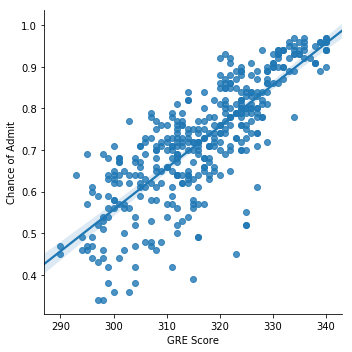

In [12]:
#lmplot on GRE Score and Admissions
sns.lmplot(x='GRE Score', y='Chance of Admit', data = admissions)

In [13]:
#Drop Serial Number column from dataset using pandas and then split dataset into predictors and predicted variable
admissions = admissions.drop(['Serial No.'], axis = 1)
X = admissions[['GRE Score','TOEFL Score','University Rating', 'SOP','LOR ','CGPA','Research']]
y = admissions[['Chance of Admit']]


In [14]:
#Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)


In [15]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_imputed_train = sc_X.fit_transform(X_train)
X_imputed_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_imputed_train = sc_y.fit_transform(y_train)
y_imputed_test = sc_y.transform(y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [16]:
#scikit-learn drops the column headers so adding them back
X_imputed_train = pd.DataFrame(X_imputed_train, columns = X_train.columns)
X_imputed_test = pd.DataFrame(X_imputed_test, columns = X_test.columns)
y_imputed_train = pd.DataFrame(y_imputed_train, columns = y_train.columns)
y_imputed_test = pd.DataFrame(y_imputed_test, columns = y_test.columns)


In [17]:
#Import linear regression function 
from sklearn.linear_model import LinearRegression

In [18]:
#Specifying a variable to Linear Regression
lm = LinearRegression()

In [19]:
#Creating model using training set
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
#Assess the coefficients of Regression
lm.coef_

array([[ 0.00209355,  0.00309749,  0.00933491, -0.00221377,  0.01932168,
         0.11543814,  0.01547871]])

In [21]:
#Predict test set
predict = lm.predict(X_test)

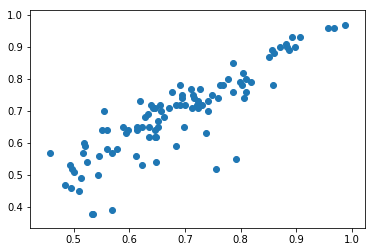

In [22]:
#Scatter plot to visualize predictions 
plt.scatter(predict,y_test)

In [23]:
#Importing metrics to see Mean Absolute Error of prediction
from sklearn import metrics

In [24]:
#Predicting MSE
metrics.mean_absolute_error(y_test,predict)

0.04624069108067366

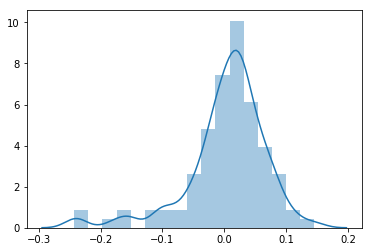

In [25]:
#Distribution of error
sns.distplot((y_test-predict))

In [26]:
#R2 of our results
metrics.explained_variance_score(y_test,predict)

0.7588593213889361